In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

import SimLight as sl
import SimLight.plottools as slpl

SimLight 0.0.2



In [2]:
# unit
m = 1
cm = 1e-2
mm = 1e-3
µm = 1e-6
nm = 1e-9

In [3]:
wavelength = 0.550 * µm
size = 1.8 * 2 * mm
N = 2000  # pixel number
j = 15  # zernike order
mag = 3.5  # magnification
a = 0.025  # range of zernike coefficients
random.seed(213838811)

In [4]:
# longitudinal aberration of objective lens
x = np.linspace(-size / 2, size / 2, N)
X, Y = np.meshgrid(x, x)
rho = np.sqrt(X**2 + Y**2) / (size / 2)
longitude = -mag**2 * 1e-4 * (rho**7 - 0.5 * rho**5 + 0.5 * rho**9 - 0.05 * rho**3 + 0.05 * rho**11 - 0.1)

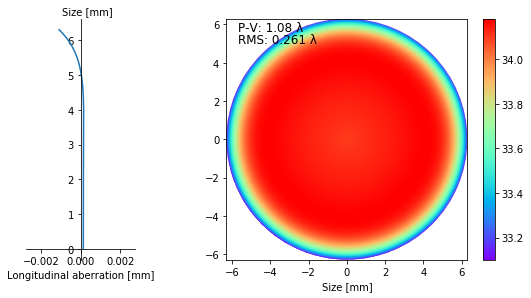

In [5]:
F = sl.PlaneWave(wavelength, size, N)
L = sl.Lens.new_lens(size, f=20*mm/mag)
L_ol = sl.Lens.new_lens(size*mag, f=1.8*mm*mag)
F_ol = sl.longitudinal_to_wavefront(L_ol, longitude)
F_mag = sl.PlaneWave(wavelength, size*mag, N)
L_mag = sl.Lens.new_lens(size*mag, f=20*mm)

In [6]:
# aberration profile setting by zernike polynomials
# spherical aberration due to cover glass at d = 10 µm
Z_cover = sl.zernike.ZernikeCoefficients(j)
Z_cover.coefficients[0] = 0.16637466
Z_cover.coefficients[4] = 0.05746862
Z_cover.coefficients[12] = -0.02268995
Z_cover.coefficients *= mag
# random aberration due to refractive index distribution in sample
Z_cytosol = sl.zernike.ZernikeCoefficients(j)
for i in range(j):
    Z_cytosol.coefficients[i] = random.uniform(-2*a, 2*a)

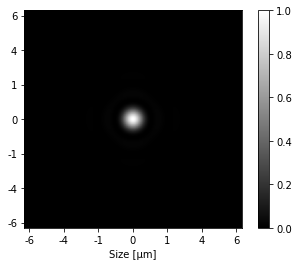

In [7]:
# reference aberration free PSF
F_c = sl.circle_aperture(F_mag)
F_c = sl.near_field_propagation(F_c, L_mag, z=20*mm, mag=1, coord='spherical')
F_c.plot_intensity(dimension=2, norm_type=1, mag=0.5)

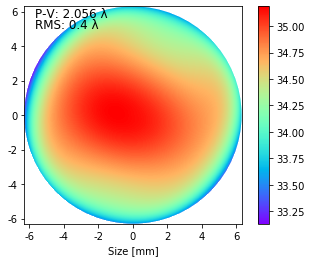

In [8]:
F_cytosol = sl.aberration(F_ol, Z_cytosol)
F_all = sl.aberration(F_cytosol, Z_cover)
F_all.plot_wavefront(mask_r=1)

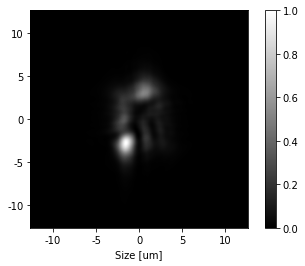

In [9]:
F_allc = sl.circle_aperture(F_all)
F_allc = sl.near_field_propagation(F_allc, L_mag, z=20*mm, mag=1, coord='spherical')
F_allc.plot_intensity(dimension=2, norm_type=1, mag=1, unit='um')

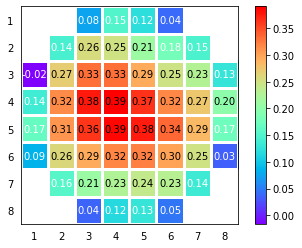

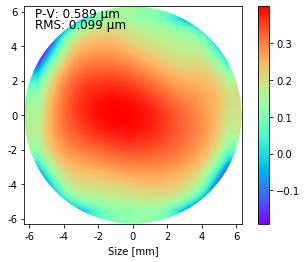

In [10]:
slpl.plot_dm_wavefront(F_all, 8, mask_r=1)

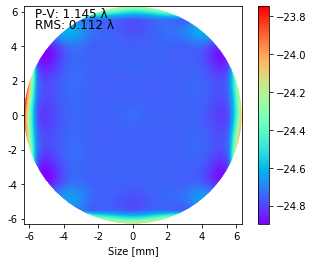

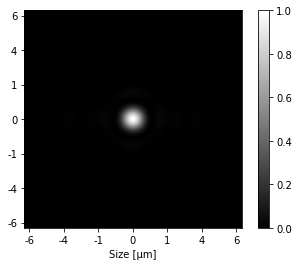

In [11]:
F_dm = sl.deformable_mirror(F_all, 8)
F_dm.plot_wavefront(mask_r=1)
F_dmc = sl.circle_aperture(F_dm)
F_dmc = sl.near_field_propagation(F_dm, L_mag, z=20*mm, mag=1, coord='spherical')
F_dmc.plot_intensity(dimension=2, norm_type=1, mag=0.5)

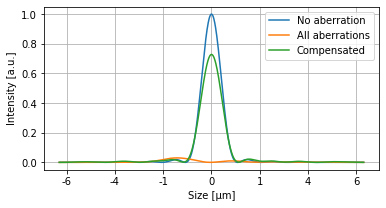

In [12]:
slpl.plot_multi_intensities_diff(F_c, F_allc, F_dmc, labels=['No aberration', 'All aberrations', 'Compensated'], norm_type=1, mag=0.5, figsize=(6, 3), shift=[0, 160, 0])